In [15]:
import cv2
import matplotlib.pyplot as plt
import numpy as np
%matplotlib inline

In [3]:
img = cv2.imread('et1.jpeg')
train_img = cv2.cvtColor(img,cv2.COLOR_BGR2RGB)

In [4]:
train_gray = cv2.cvtColor(img,cv2.COLOR_RGB2GRAY)

In [5]:
test_img = cv2.pyrDown(train_img)
test_img = cv2.pyrDown(test_img)
num_rows,num_cols = test_img.shape[:2]

In [6]:
rotation_matrix = cv2.getRotationMatrix2D((num_cols/2,num_rows/2),30,1)
test_img = cv2.warpAffine(test_img,rotation_matrix,(num_cols,num_rows))

In [8]:
test_gray = cv2.cvtColor(test_img,cv2.COLOR_RGB2GRAY)

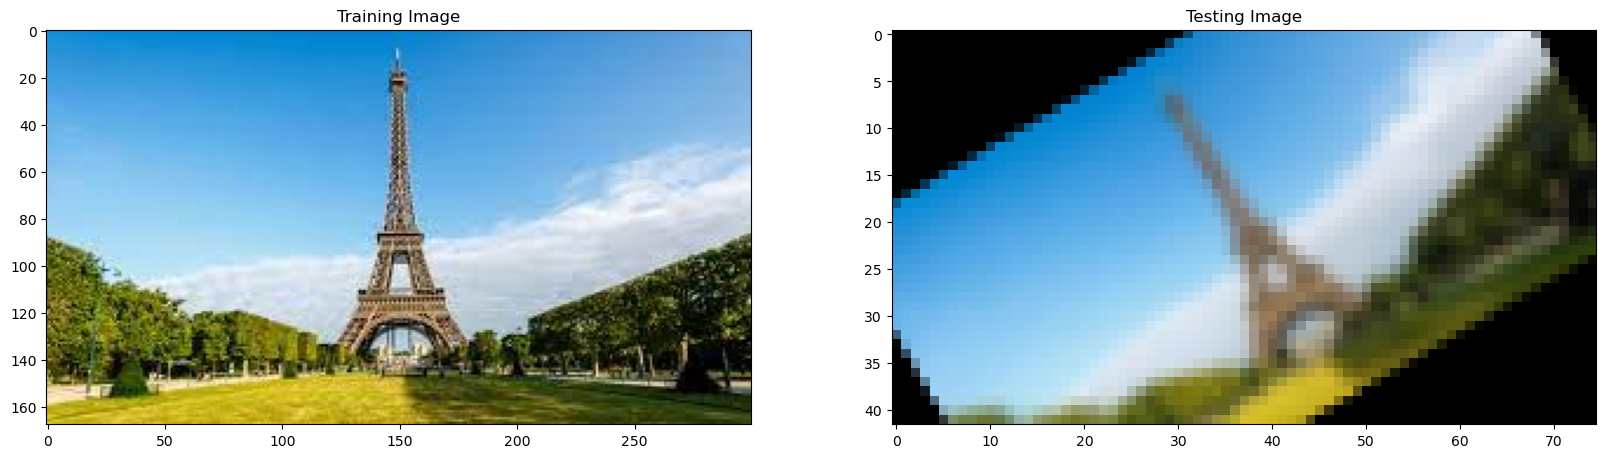

In [11]:
fx,plots = plt.subplots(1,2, figsize=(20,10))
plots[0].set_title("Training Image")
plots[0].imshow(train_img)

plots[1].set_title("Testing Image")
plots[1].imshow(test_img)

# Detecting Keypoints and Creating Descriptors

In [12]:
#Creating an object of SIFT descriptor
sift = cv2.xfeatures2d.SIFT_create()

In [13]:
train_keypoints, train_descriptor = sift.detectAndCompute(train_gray,None)
test_keypoints, test_descriptor = sift.detectAndCompute(test_gray,None)

In [16]:
keypoints_without_size = np.copy(train_img)
keypoints_with_size = np.copy(train_img)

In [17]:
cv2.drawKeypoints(train_img, train_keypoints, keypoints_without_size, color = (255,0,0))
cv2.drawKeypoints(train_img, train_keypoints, keypoints_with_size, flags = cv2.DRAW_MATCHES_FLAGS_DRAW_RICH_KEYPOINTS)

array([[[ 19, 143, 215],
        [ 19, 143, 215],
        [ 18, 142, 214],
        ...,
        [110, 167, 222],
        [111, 166, 222],
        [111, 166, 222]],

       [[ 19, 143, 215],
        [ 19, 143, 215],
        [ 19, 143, 215],
        ...,
        [111, 168, 223],
        [112, 167, 223],
        [112, 167, 223]],

       [[ 22, 144, 217],
        [ 21, 143, 216],
        [ 21, 143, 216],
        ...,
        [112, 169, 224],
        [113, 168, 222],
        [113, 168, 222]],

       ...,

       [[216, 199,  49],
        [204, 187,  37],
        [186, 169,  19],
        ...,
        [ 66,  80,  27],
        [ 66,  80,  27],
        [ 66,  80,  27]],

       [[165, 148,   0],
        [176, 159,   9],
        [193, 176,  26],
        ...,
        [ 54,  69,  14],
        [ 54,  69,  12],
        [ 54,  69,  12]],

       [[224, 207,  57],
        [219, 202,  52],
        [212, 195,  45],
        ...,
        [ 55,  70,  13],
        [ 55,  70,  11],
        [ 55,  70,  11]]

Number of keypoints found in training image :  236
Number of keypoints found in test image :  17


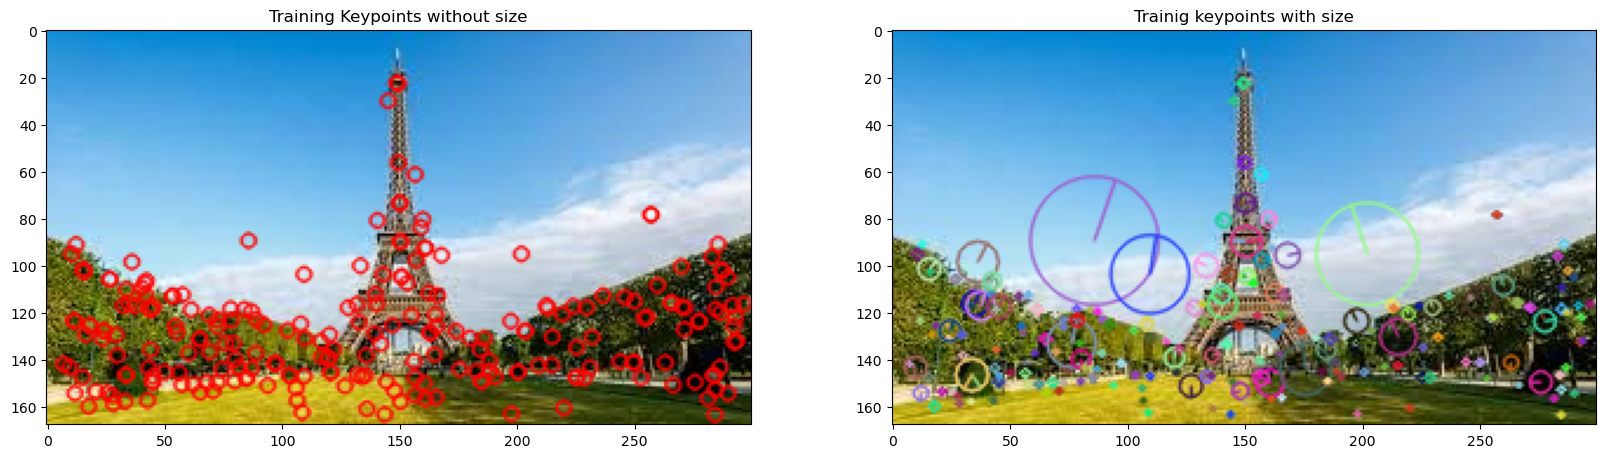

In [18]:
fx,plots = plt.subplots(1,2, figsize=(20,10))
plots[0].set_title("Training Keypoints without size")
plots[0].imshow(keypoints_without_size,cmap='gray')

plots[1].set_title("Trainig keypoints with size")
plots[1].imshow(keypoints_with_size, cmap='gray')

print("Number of keypoints found in training image : ",len(train_keypoints))
print("Number of keypoints found in test image : ",len(test_keypoints))

# Matching the keypoints

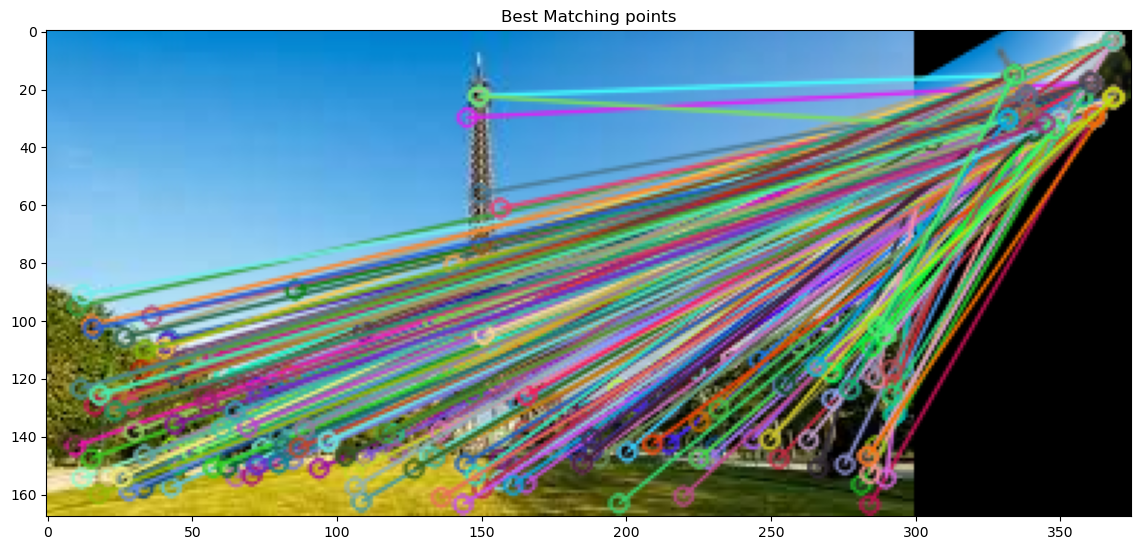


Number of matching keypoints between Training and Test Image :  236


In [21]:
#Brute force matcher object
bf = cv2.BFMatcher(cv2.NORM_L1, crossCheck = False)

#matching the descriptors of training and test image
matches = bf.match(train_descriptor,test_descriptor)
 
# One with shorter distance is that we need
matches = sorted(matches,key = lambda x : x.distance)

result = cv2.drawMatches(train_img,train_keypoints,test_img,test_keypoints,matches,test_gray,flags=2)

#Display the best matching points
plt.rcParams['figure.figsize'] = [14.0, 7.0]
plt.title("Best Matching points")
plt.imshow(result)
plt.show()

print('\nNumber of matching keypoints between Training and Test Image : ',len(matches))